In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import Normalizer
from KMeansImp import *

In [21]:
test_irisData = open('1668786396_6504366_test-data-iris.txt', 'r')
test_irisData = np.loadtxt("1668786396_6504366_test-data-iris.txt", dtype=float)
#print(test_irisData)
#now we try to normalize the data
transformer = Normalizer().fit(test_irisData)
test_irisDataSet = transformer.transform(test_irisData)
print(test_irisDataSet)
print(len(test_irisDataSet))

[[0.77381111 0.59732787 0.2036345  0.05430253]
 [0.77867447 0.59462414 0.19820805 0.02831544]
 [0.76578311 0.60379053 0.22089897 0.0147266 ]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.69299099 0.34199555 0.60299216 0.19799743]
 [0.71578999 0.34430405 0.5798805  0.18121266]
 [0.76693897 0.57144472 0.28572236 0.06015208]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.77729093 0.57915795 0.24385598 0.030482  ]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.78591858 0.57017622 0.23115252 0.06164067]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.79837025 0.55735281 0.22595384 0.03012718]
 [0.69198788 0.34599394 0.58626751 0.24027357]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.77577075 0.60712493 0.16864581 0.03372916]
 [0.78889479 0.55222635 0.25244633 0.09466737]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.80377277 

In [22]:
#now we try to fit our K-Means clustering model implementation into our dataset
labels = np.zeros((10,150))
errs = np.zeros((10,3))
cents = np.zeros((10,3,4))

for i in range(10):
    KMeanCalculation = KMeansImp(X_Data = test_irisDataSet, K_Clusters = 3, F_random = 4)
    KMeanCalculation.randomCentroid()
    cents[i], errs[i], labels[i] = KMeanCalculation.Main(itr = 40)

In [23]:
#now we use the total errors and calculate the one with min error
totError = errs.sum(axis =1)
optKMean = np.argmin(totError)
print('Error: ', errs)
print('Total Error: ', totError)
print('Optimal KMeans: ', totError[optKMean])

Error:  [[2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [2.49441473 2.03316191 1.71728029]
 [2.03316191 2.49441473 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [2.49441473 2.03316191 1.71728029]
 [6.25563126 0.81100471 0.84560128]
 [6.25563126 0.81100471 0.84560128]
 [2.03316191 2.49441473 1.71728029]
 [2.03316191 2.49441473 1.71728029]]
Total Error:  [6.24485693 7.91223726 6.24485693 6.24485693 7.91223726 6.24485693
 7.91223726 7.91223726 6.24485693 6.24485693]
Optimal KMeans:  6.244856927285093


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


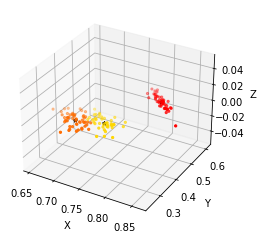

In [24]:
# now we calculate the predictions
pred = labels[optKMean].astype(int)
#we try to visualize our predictions in the form of graphical clustering
graph = plt.figure()
plot = graph.add_subplot(projection = '3d')
colorPlot = plt.cm.get_cmap('hsv', 15)

#since there are 3 clusters to be assigned
for i in range(3):
    plot.scatter(test_irisDataSet[labels[optKMean] == i][:,0], test_irisDataSet[labels[optKMean] == i][:, 1], s=5, c= colorPlot(i))
    plot.scatter(cents[optKMean][i,0], cents[optKMean][i,1], marker = '*', s=15, c= 'black')
    

plot.set_xlabel('X')
plot.set_ylabel('Y')
plot.set_zlabel('Z')

plt.show()

In [25]:
#Using silhouette coeff for the validation of our model
from sklearn.metrics import silhouette_score
scr = silhouette_score(test_irisDataSet,pred)
print(f'Score:{scr}')

Score:0.5761482778266828


In [26]:
# now lets write the predictions to a file
np.savetxt("newFormatPred01" + ".txt", pred, fmt = '%s')